In [1]:
# y=[]
# x=np.linspace(-3,3,100)
# for i in x:
#     tensor_x = torch.zeros((1, 1, 28, 28)).to(device)
#     #modificar el primer pixel de la imagen
#     tensor_x[0,0,2,0]=i
#     post_conv=model.conv2(tensor_x)
#     y_aux=post_conv[0][0][0][0].item()
#     y.append(y_aux)


# plt.plot(x,y)

In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

import torch

from architectures_28x28.SimpleModels import *
from architectures_28x28.KANConvs_MLP import KANC_MLP
from architectures_28x28.KKAN import *
from architectures_28x28.conv_and_kan import NormalConvsKAN


In [3]:
device = torch.device('cpu')

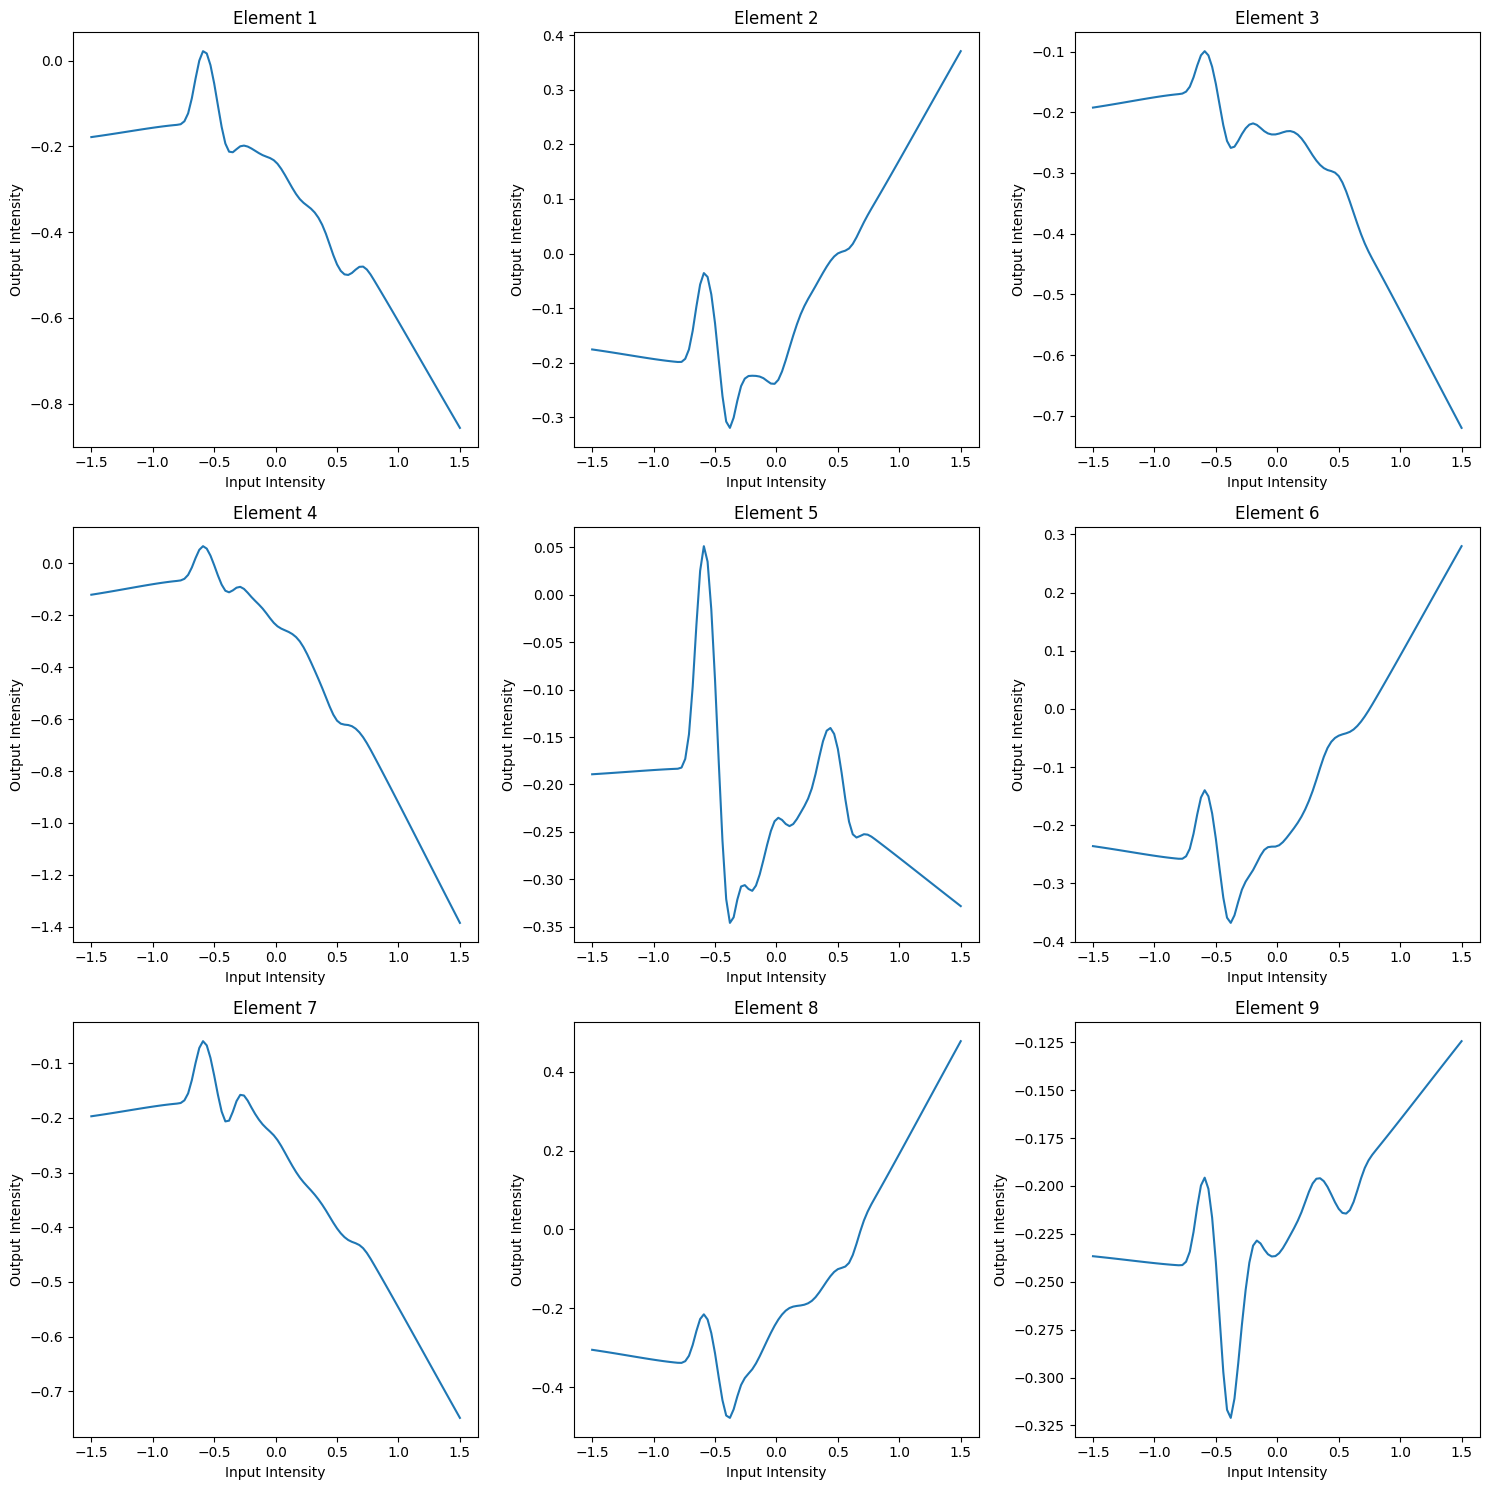

In [11]:
# Load the model
model = torch.load('models/FashionMNIST_torchlike/KKAN (Medium) (gs = 10).pt',map_location=torch.device('cpu'))
model.eval()  # Set the model to evaluation mode
x=torch.tensor(np.linspace(-1.5,1.5,100))

# Prepare the figure for subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
kernels = model.conv1.convs[0]
# Loop through the first 9 kernels
for idx in range(9):
    ax = axs[idx // 3, idx % 3]  # Get the appropriate subplot
    tensor_x = torch.zeros((1,1,3,3),device = device)
    res = []
    for g in np.linspace(-3,3,100):
        tensor_x[:,:,idx // 3, idx % 3] = g 
        res.append(kernels(tensor_x).item())
    ax.plot(x, res)  # Plot the spline of the kernel
    ax.set_title(f'Element {idx + 1}')  # Set the title for each subplot
    ax.set_xlabel("Input Intensity")  # Add x-label
    ax.set_ylabel("Output Intensity")  # Add y-label

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plots